In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import evap_priestley_taylor

In [8]:
cfg_file='topoflow/examples/Treynor_Iowa/June_20_67_evap_priestley_taylor.cfg'
evap=evap_priestley_taylor.evap_component()

In [9]:
# will not run without these
evap.Qn_SW=310
evap.Qn_LW=110
evap.T_air=20
evap.T_surf=10
evap.initialize(cfg_file);

 
Evaporation component: Initializing...
Imported netCDF4 version: 1.1.9


In [10]:
time = [evap.get_current_time().copy()]
# NOTE: EMELI does not have get_value
#Qc=[evap.Qc.copy()] #'W m-2' 'land_surface_soil__conduction_heat_flux'
#NOTE: that the model calculates Qc only after update 
Qc=[0.0]
vol_ET=[evap.vol_ET.copy()]  #'m3' 'land_surface_water__domain_time_integral_of_evaporation_volume_flux'
ET=[evap.ET.copy()]  #'m s-1' 'land_surface_water__evaporation_volume_flux' 

while evap.get_current_time() < evap.get_end_time():
    print evap.get_current_time(), evap.get_end_time()
    evap.update()
    time.append(evap.get_current_time().copy())
   
    Qc.append(evap.Qc.copy()) 
    vol_ET.append(evap.vol_ET.copy()) 
    ET.append(evap.ET.copy())  

print np.shape(time), np.shape(Qc), np.shape(vol_ET), np.shape(ET)

0.0 36000.0
3600.0 36000.0
7200.0 36000.0
10800.0 36000.0
14400.0 36000.0
18000.0 36000.0
21600.0 36000.0
25200.0 36000.0
28800.0 36000.0
32400.0 36000.0
(11,) (11,) (11,) (11, 44, 29)


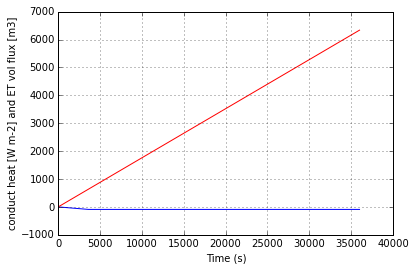

In [11]:
plt.plot(time,Qc,'b',time,vol_ET,'r'); 
plt.xlabel('Time (s)')
plt.ylabel('conduct heat [W m-2] and ET vol flux [m3]')
plt.grid(); plt.show()